In [1]:
import json
import pandas as pd
import os
from vega import VegaLite
%run table_utils

benchmark_dir = "../benchmarks"

def load_input_table(fname):
    with open(os.path.join(benchmark_dir, fname), "r") as f:
        benchmark = json.load(f)
        input_data = benchmark["input_data"]
        df = pd.DataFrame.from_records(input_data)
        df = load_and_clean_table(df, return_as_df=True)
        return df

   Actual Profits  Number of Units   Quarter
0            3358               23  Quarter1
1            3829               27  Quarter2
2            2374               15  Quarter3
3            3373               43  Quarter4


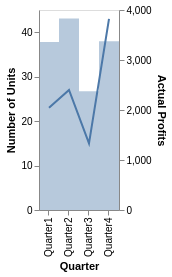

In [2]:
df1 = load_input_table("001.json")
#df = pd.melt(df, id_vars='Quarter', value_vars=["Actual Profits", "No. of Units"])

print(df1)

chart = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"type": "line"},
            "encoding": {
                "y": {"field": "Number of Units", "type": "quantitative"},
                "x": { "field": "Quarter", "type": "nominal" }
            }
        }, 
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "encoding": {
                "y": {"type": "quantitative", "field": "Actual Profits"},
                "x": { "field": "Quarter", "type": "nominal" }
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

VegaLite(chart, df1)

     Month          variable  value
0   Apr-15        Low (<50%}  0.500
1   May-15        Low (<50%}  0.500
2   Jun-15        Low (<50%}  0.500
3   Jul-15        Low (<50%}  0.500
4   Aug-15        Low (<50%}  0.500
5   Sep-15        Low (<50%}  0.500
6   Oct-15        Low (<50%}  0.500
7   Nov-15        Low (<50%}  0.500
8   Dec-15        Low (<50%}  0.500
9   Jan-16        Low (<50%}  0.500
10  Feb-16        Low (<50%}  0.500
11  Mar-16        Low (<50%}  0.500
12  Apr-15  Medium (50%-80%}  0.300
13  May-15  Medium (50%-80%}  0.300
14  Jun-15  Medium (50%-80%}  0.300
15  Jul-15  Medium (50%-80%}  0.300
16  Aug-15  Medium (50%-80%}  0.300
17  Sep-15  Medium (50%-80%}  0.300
18  Oct-15  Medium (50%-80%}  0.300
19  Nov-15  Medium (50%-80%}  0.300
20  Dec-15  Medium (50%-80%}  0.300
21  Jan-16  Medium (50%-80%}  0.300
22  Feb-16  Medium (50%-80%}  0.300
23  Mar-16  Medium (50%-80%}  0.300
24  Apr-15       High (>80%)  0.200
25  May-15       High (>80%)  0.200
26  Jun-15       High (>80%)

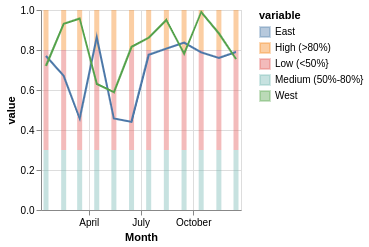

In [3]:
df2 = load_input_table("002.json")

df2 = pd.melt(df2, id_vars='Month', value_vars=["Low (<50%}", "Medium (50%-80%}", "High (>80%)", "East", "West"])

print(df2)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.variable != \"East\" && datum.variable != \"West\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Month", "type": "temporal" }
            }
        }, 
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"East\" || datum.variable == \"West\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Month", "type": "temporal" }
            }
        }
  ]
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df2)

    Month  Net Cash Flow  Net Cash Flow Sum       c      d
0   Start          80000              80000       0  False
1     Apr          -5003              74997   80000   True
2     May         -16700              58297   74997   True
3     Jun          48802             107099   58297  False
4     Jul         -11198              95901  107099   True
5     Aug         -35260              60641   95901   True
6     Sep          18220              78861   60641  False
7     Oct         -23840              55021   78861   True
8     Nov          43250              98271   55021  False
9     Dec         -18280              79991   98271   True
10    Jan          26670             106661   79991  False
11    Feb          15000             121661  106661  False
12    Mar          24750             146411  121661  False


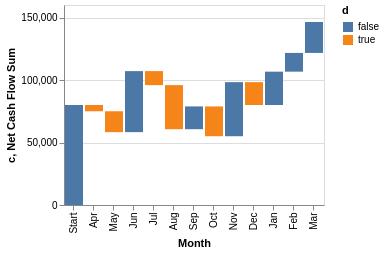

In [4]:
df3 = load_input_table("003.json")

df3_1 = df3["Net Cash Flow"].cumsum()
df3 = df3.join(df3_1, lsuffix='', rsuffix=' Sum')
df3 = df3.assign(c=df3["Net Cash Flow Sum"]-df3["Net Cash Flow"])
df3 = df3.assign(d=df3["c"]>df3["Net Cash Flow Sum"])

print(df3)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": {"field": "Month", "type": "nominal", "sort": "none"},
        "y2": {
          "field": "Net Cash Flow Sum",
          "type": "quantitative"    
        },
        "y": {"field": "c", "type": "quantitative"},
        "color": {"field": "d", "type": "nominal"},
    }
}

VegaLite(vl_spec, df3)

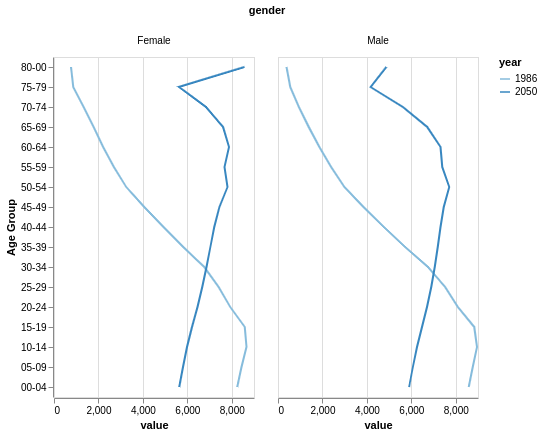

In [5]:
df4 = load_input_table("004.json")

df4 = pd.melt(df4, id_vars='Age Group', value_vars=["Female-1986", "Female-2050", "Male-1986", "Male-2050"])

split_col = df4["variable"].str.split("-", expand=True)
df4["gender"] = split_col[0]
df4["year"] = split_col[1]

#print(df4)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "y": {"field": "Age Group", "type": "nominal", "sort": "descending"},
        "x": {
          "field": "value",
          "type": "quantitative"    
        },
        "column": {"field": "gender", "type": "nominal"},
        "color": {"field": "year","type": "ordinal"},
    }
}

VegaLite(vl_spec, df4)

   Month variable    value
0    Jan     Cost   6.0000
1    Feb     Cost  15.0000
2    Mar     Cost  24.0000
3    Apr     Cost  33.0000
4    May     Cost  42.0000
5    Jun     Cost  51.0000
6    Jan   Profit   4.0000
7    Feb   Profit   5.0000
8    Mar   Profit   6.0000
9    Apr   Profit   7.0000
10   May   Profit   8.0000
11   Jun   Profit   9.0000
12   Jan      ROI   0.6667
13   Feb      ROI   0.3333
14   Mar      ROI   0.2500
15   Apr      ROI   0.2121
16   May      ROI   0.1905
17   Jun      ROI   0.1765
18   Jan    Sales  10.0000
19   Feb    Sales  20.0000
20   Mar    Sales  30.0000
21   Apr    Sales  40.0000
22   May    Sales  50.0000
23   Jun    Sales  60.0000
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {
                "type": "bar"
            },
            "transform": [
                {
                    "filter": "datum.variable != \"ROI\""
                }
            ],
            "encoding": {
   

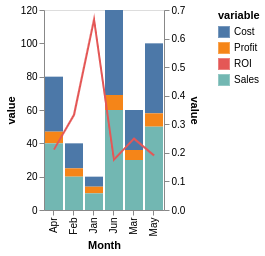

In [6]:
df5 = load_input_table("005.json")

df5 = pd.melt(df5, id_vars='Month', value_vars=["Cost", "Profit", "ROI", "Sales"])

print(df5)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"type": "bar"},
            "transform": [{"filter": "datum.variable != \"ROI\""}],
            "encoding": {
                "x": { "field": "Month", "type": "nominal" },
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        },
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"ROI\""}],
            "encoding": {
                "x": { "field": "Month", "type": "nominal" },
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df5)

     Bucket  variable  value
0  Bucket E    Actual    115
1  Bucket D    Actual     90
2  Bucket C    Actual    115
3  Bucket B    Actual    140
4  Bucket A    Actual    150
5  Bucket E  Budgeted    100
6  Bucket D  Budgeted    100
7  Bucket C  Budgeted    125
8  Bucket B  Budgeted    125
9  Bucket A  Budgeted    140


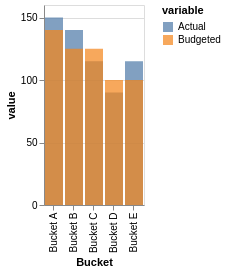

In [7]:
df6 = load_input_table("006.json")

df6 = pd.melt(df6, id_vars='Bucket', value_vars=["Actual", "Budgeted"])

print(df6)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "value", "type": "quantitative", "stack": None},
        "x": { "field": "Bucket", "type": "nominal" },
        "opacity": {"value": 0.7}
    }
}

VegaLite(vl_spec, df6)

   Agree  Disagree  Strongly Agree  Strongly Disagree
0   0.35      0.08            0.50               0.07
1   0.10      0.10            0.70               0.10
2   0.30      0.15            0.45               0.10
[{"id": 0, "variable": "Strongly Disagree", "value": 0.07}, {"id": 1, "variable": "Strongly Disagree", "value": 0.1}, {"id": 2, "variable": "Strongly Disagree", "value": 0.1}, {"id": 0, "variable": "Agree", "value": 0.35}, {"id": 1, "variable": "Agree", "value": 0.1}, {"id": 2, "variable": "Agree", "value": 0.3}, {"id": 0, "variable": "Disagree", "value": 0.08}, {"id": 1, "variable": "Disagree", "value": 0.1}, {"id": 2, "variable": "Disagree", "value": 0.15}, {"id": 0, "variable": "Strongly Agree", "value": 0.5}, {"id": 1, "variable": "Strongly Agree", "value": 0.7}, {"id": 2, "variable": "Strongly Agree", "value": 0.45}]


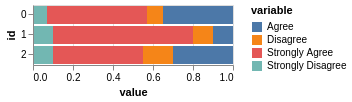

In [8]:
df7 = load_input_table("007.json")

print(df7)

df7['id'] = df7.index
df7 = pd.melt(df7, id_vars='id', value_vars=["Strongly Disagree", "Agree", "Disagree", "Strongly Agree"])

print(json.dumps(df7.to_dict(orient="records")))

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "id", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative"}    
    }
}

VegaLite(vl_spec, df7)

[{'variable': 'Y1', 'lower range': 0.39, 'means': 0.52, 'stddev': 0.1328, 'upper range': 0.66}, {'variable': 'Y2', 'lower range': 0.44, 'means': 0.57, 'stddev': 0.1321, 'upper range': 0.7}, {'variable': 'Y3', 'lower range': 0.47, 'means': 0.6, 'stddev': 0.1303, 'upper range': 0.73}, {'variable': 'Y4', 'lower range': 0.5, 'means': 0.63, 'stddev': 0.1266, 'upper range': 0.75}, {'variable': 'Y5', 'lower range': 0.51, 'means': 0.63, 'stddev': 0.1225, 'upper range': 0.75}]


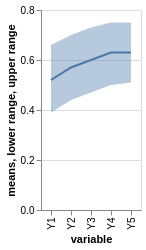

In [9]:
df8 = load_input_table("008.json")

# gather(dat, "col1", "col2", -Value) %>% spread(Value, col2)
df8 = pd.melt(df8, id_vars='Value', value_vars=["Y1", "Y2", "Y3", "Y4", "Y5"])
df8 = df8.pivot(index='variable',columns='Value', values='value').reset_index()
df8 = load_and_clean_table(df8)

print(df8)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": "line",
            "encoding": {
                "x": { "field": "variable", "type": "nominal" },
                "y": {"field": "means", "type": "quantitative"}
            }
        }, 
        {
            "mark": {"opacity": 0.4, "type": "area"},
            "encoding": {
                "x": { "field": "variable", "type": "nominal" },
                "y": {"type": "quantitative", "field": "lower range"},
                "y2": {"type": "quantitative", "field": "upper range"}
            }
        }
  ]
}

VegaLite(vl_spec, df8)

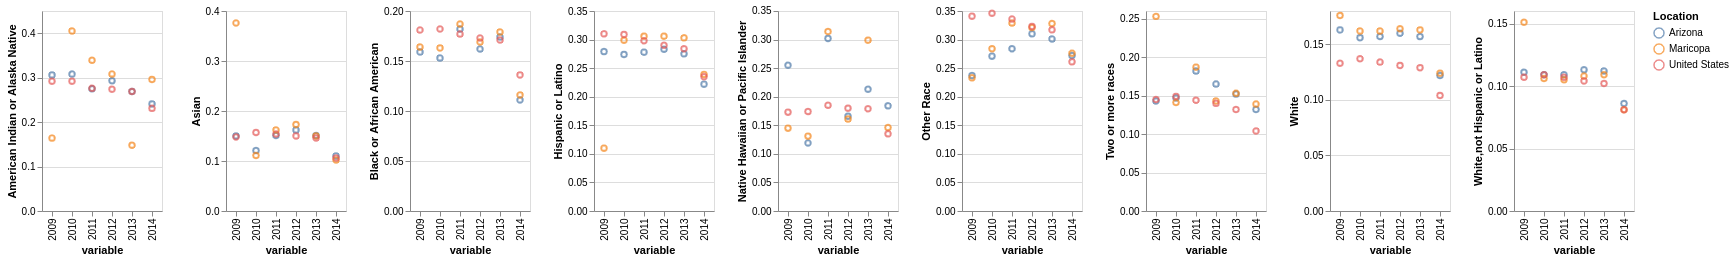

In [10]:
df9 = load_input_table("009.json")
df9 = pd.melt(df9, id_vars=['Location', 'Rae'], value_vars=["2009", "2010", "2011", "2012", "2013", "2014"])
df9 = df9.pivot_table(index=["Location", "variable"], columns='Rae', values='value').reset_index()

#print(df9)

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "repeat": ["American Indian or Alaska Native", "Asian", "Black or African American", 
               "Hispanic or Latino", "Native Hawaiian or Pacific Islander", "Other Race",
               "Two or more races", "White", "White,not Hispanic or Latino"],
    "columns": 10,
  "spec": {
    "encoding": {
        "x": { "field": "variable", "type": "nominal" }
    },
    "layer": [
        {
            "mark": "point",
            "encoding": {
                "y": {"field": {"repeat": "repeat"}, "type": "quantitative"},
                "color": {"field": "Location", "type": "nominal"}
            }
        }
    ]
  }
}, df9)

          Location                                  Rae variable  value
0    United States                                White     2009  0.133
1    United States            Black or African American     2009  0.181
2    United States     American Indian or Alaska Native     2009  0.292
3    United States                                Asian     2009  0.148
4    United States  Native Hawaiian or Pacific Islander     2009  0.173
5    United States                           Other Race     2009  0.341
6    United States                    Two or more races     2009  0.145
7    United States         White,not Hispanic or Latino     2009  0.107
8    United States                   Hispanic or Latino     2009  0.310
9          Arizona                                White     2009  0.163
10         Arizona            Black or African American     2009  0.159
11         Arizona     American Indian or Alaska Native     2009  0.306
12         Arizona                                Asian     2009

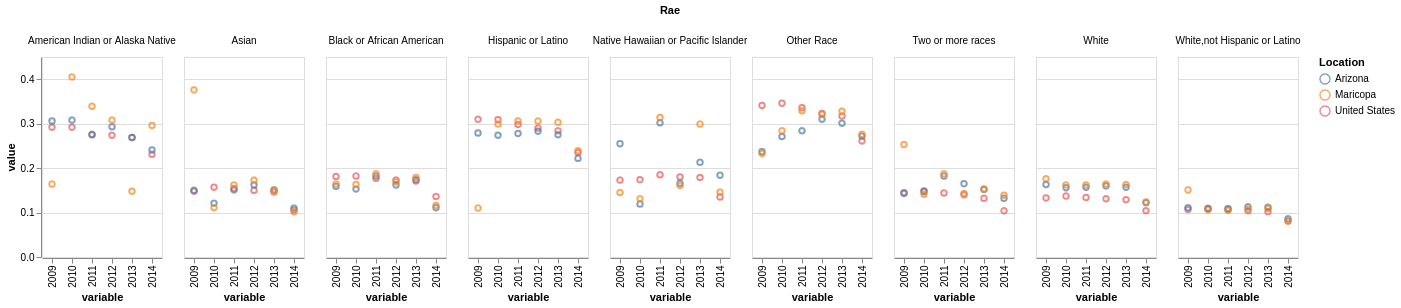

In [11]:
df9 = load_input_table("009.json")
df9 = pd.melt(df9, id_vars=['Location', 'Rae'], value_vars=["2009", "2010", "2011", "2012", "2013", "2014"])

print(df9)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "point",
    "encoding": {
        "x": { "field": "variable", "type": "nominal" },
        "y": {"field": "value", "type": "quantitative"},
        "color": {"field": "Location", "type": "nominal"},
        "column": {"field": "Rae", "type": "nominal"}
    }
}

VegaLite(vl_spec, df9)

      Class variable  value
0  Literacy     Fall     34
1  Language     Fall     63
2      Math     Fall     67
3   Science     Fall     92
4      Arts     Fall     96
5  Literacy   Spring     69
6  Language   Spring     77
7      Math   Spring     75
8   Science   Spring     98
9      Arts   Spring    100


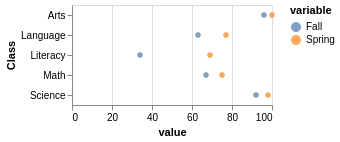

In [12]:
df10 = load_input_table("010.json")
df10 = pd.melt(df10, id_vars="Class", value_vars=['Fall', 'Spring'])

print(df10)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "y": {"field": "Class", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative" },
        "color": {"field": "variable", "type": "nominal"}
    }

}

VegaLite(vl_spec, df10)

    C1        C2       variable  value
0   Q1  Targeted           EMEA   0.66
1   Q1   Engaged           EMEA   0.65
2   Q1   Pitched           EMEA   0.59
3   Q1   Adopted           EMEA   0.52
4   Q2  Targeted           EMEA   0.56
5   Q2   Engaged           EMEA   0.54
6   Q2   Pitched           EMEA   0.50
7   Q2   Adopted           EMEA   0.42
8   Q3  Targeted           EMEA   0.91
9   Q3   Engaged           EMEA   0.78
10  Q3   Pitched           EMEA   0.72
11  Q3   Adopted           EMEA   0.62
12  Q1  Targeted          LATAM   0.48
13  Q1   Engaged          LATAM   0.48
14  Q1   Pitched          LATAM   0.44
15  Q1   Adopted          LATAM   0.31
16  Q2  Targeted          LATAM   0.43
17  Q2   Engaged          LATAM   0.41
18  Q2   Pitched          LATAM   0.37
19  Q2   Adopted          LATAM   0.26
20  Q3  Targeted          LATAM   0.95
21  Q3   Engaged          LATAM   0.80
22  Q3   Pitched          LATAM   0.73
23  Q3   Adopted          LATAM   0.53
24  Q1  Targeted  North A

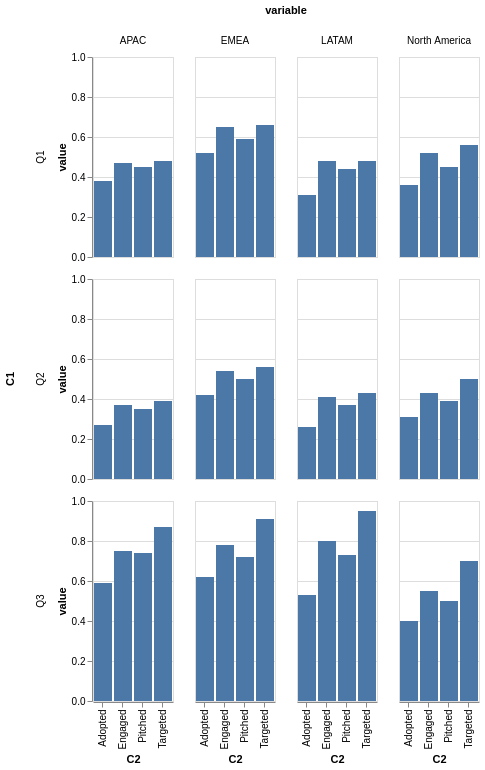

In [13]:
df11 = load_input_table("011.json")

df11 = pd.melt(df11, id_vars=["C1", "C2"], value_vars=["EMEA", "LATAM", "North America", "APAC"])

print(df11)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "C2", "type": "nominal" },
        "column": {"field": "variable", "type": "nominal"},
        "row": {"field": "C1", "type": "nominal"}
    }
}

print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df11)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "y": {
            "field": "value",
            "type": "quantitative"
        },
        "x": {
            "field": "C2",
            "type": "nominal"
        },
        "column": {
            "field": "variable",
            "type": "nominal"
        },
        "color": {
            "field": "C1",
            "type": "nominal"
        }
    }
}


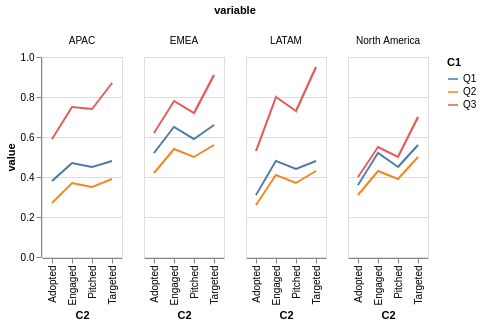

In [14]:
df12 = load_input_table("012.json")

df12 = pd.melt(df12, id_vars=["C1", "C2"], value_vars=["EMEA", "LATAM", "North America", "APAC"])

# print(df12)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "C2", "type": "nominal" },
        "column": {"field": "variable", "type": "nominal"},
        "color": {"field": "C1", "type": "nominal"}
    }
}

print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df12)

   Totals Value  alpha  beta  gamma
0       7     A      2     2      3
1       8     B      2     3      3
2       9     C      3     3      3
3       9     D      3     4      2
4       9     E      4     3      2
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": "bar",
            "encoding": {
                "x": {
                    "field": "Value",
                    "type": "nominal"
                },
                "y": {
                    "field": "value",
                    "type": "quantitative"
                },
                "color": {
                    "field": "variable",
                    "type": "nominal"
                },
                "order": {
                    "field": "variable",
                    "type": "quantitative",
                    "sort": "ascending"
                }
            }
        },
        {
            "mark": "point",
            "encoding": {
            

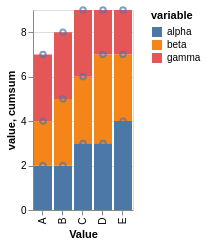

In [15]:
df13 = load_input_table("013.json")

print(df13)

df13 = pd.melt(df13, id_vars=["Totals", "Value"], value_vars=["alpha", "beta", "gamma"])
df13['cumsum'] = df13.groupby("Value")['value'].transform(pd.Series.cumsum)

#print(df13)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "bar",
        "encoding": {
            "x": { "field": "Value", "type": "nominal" },
            "y": { "field": "value", "type": "quantitative"},
            "color": {"field": "variable", "type": "nominal"},
            "order": {"field": "variable", "type": "quantitative", "sort": "ascending"}
        }
    },  {
      "mark": "point",
      "encoding": {
        "x": { "field": "Value", "type": "nominal" },
        "y": { "field": "cumsum", "type": "quantitative"},
        "text": {"field": "value", "type": "quantitative"}
      }
    }]
}

print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df13)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": {
            "field": "s0",
            "type": "quantitative"
        },
        "x2": {
            "field": "s1",
            "type": "quantitative"
        },
        "y": {
            "field": "Shift",
            "type": "nominal"
        }
    }
}


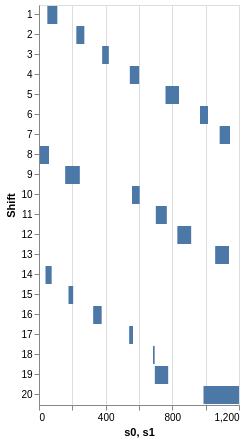

In [16]:
df14 = load_input_table("014.json")

split_col = df14["End of Shift"].str.split("/", expand=True)
df14["s1"] = split_col[0]
split_col = df14["Start of Shift"].str.split("/", expand=True)
df14["s0"] = split_col[0]

df14 = load_and_clean_table(df14)
#print(df14)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "s0", "type": "quantitative"},
        "x2": { "field": "s1", "type": "quantitative"},
        "y": { "field": "Shift", "type": "nominal"}
    }
}

print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df14)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "rect",
    "encoding": {
        "y": {
            "field": "s0",
            "type": "quantitative"
        },
        "x": {
            "field": "Period",
            "type": "nominal"
        },
        "y2": {
            "field": "s1",
            "type": "quantitative"
        }
    }
}


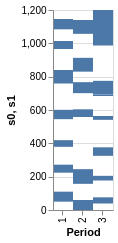

In [17]:
df15 = load_input_table("015.json")

split_col = df15["End of Shift"].str.split("/", expand=True)
df15["s1"] = split_col[0]
split_col = df15["Start of Shift"].str.split("/", expand=True)
df15["s0"] = split_col[0]

df15 = load_and_clean_table(df15)

#print(df15)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "rect",
    "encoding": {
        "y": { "field": "s0", "type": "quantitative"},
        "x": { "field": "Period", "type": "nominal"},
        "y2": { "field": "s1", "type": "quantitative"},
    }
}

print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df15)

   Amount Revenue  Variance Variance %  Year  Year Label         c
0  773000   $773K   39000.0        +5%  2011        2011  812000.0
1  812000   $812K -445000.0       -55%  2012        2012  367000.0
2  367000   $367K  117000.0       +32%  2013        2013  484000.0
3  484000   $484K  278000.0       +57%  2014        2014  762000.0
4  762000   $762K -201000.0       -26%  2015        2015  561000.0
5  561000   $561K  213000.0       +38%  2016        2016  774000.0
6  774000   $774K       NaN             2017        2017       NaN
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": {
            "field": "Year",
            "type": "nominal"
        },
        "y": {
            "field": "Amount",
            "type": "quantitative"
        },
        "y2": {
            "field": "c",
            "type": "quantitative"
        }
    }
}


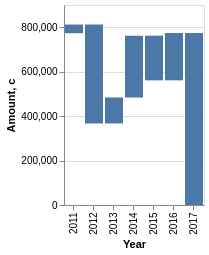

In [18]:
df16 = load_input_table("016.json")

df16["c"] = df16["Amount"] + df16["Variance"]

print(df16)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "Year", "type": "nominal"},
        "y": { "field": "Amount", "type": "quantitative"},
        "y2": { "field": "c", "type": "quantitative"},
    }
}

print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df16)

    Actual  Projected  Year
0   1000.0        NaN  2001
1   1050.0        NaN  2002
2   1110.0        NaN  2003
3   1180.0        NaN  2004
4   1260.0        NaN  2005
5   1350.0        NaN  2006
6   1450.0        NaN  2007
7   1560.0        NaN  2008
8   1680.0        NaN  2009
9   1810.0        NaN  2010
10  1950.0        NaN  2011
11  2100.0        NaN  2012
12  2260.0        NaN  2013
13  2430.0        NaN  2014
14  2610.0        NaN  2015
15  2800.0        NaN  2016
16  3000.0        NaN  2017
17  3210.0     3210.0  2018
18     NaN     4960.0  2025
19     NaN     6510.0  2030
20     NaN    10360.0  2040
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": "line",
            "encoding": {
                "x": {
                    "field": "Year",
                    "type": "nominal"
                },
                "y": {
                    "field": "Actual",
                    "type": "quantitative"
               

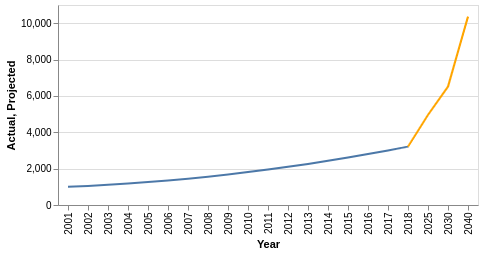

In [19]:
df17 = load_input_table("017.json")

print(df17)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "line",
        "encoding": {
            "x": { "field": "Year", "type": "nominal"},
            "y": { "field": "Actual", "type": "quantitative"},
        }},{
        "mark": {"type": "line", "color": "orange"},
        "encoding": {
            "x": { "field": "Year", "type": "nominal"},
            "y": { "field": "Projected", "type": "quantitative"},
        }
    }]
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df17)

                 Item variable  value
0   Desktop Computers     2012     20
1             Laptops     2012     34
2            Monitors     2012     12
3            Printers     2012     78
4   Desktop Computers     2013     12
5             Laptops     2013     45
6            Monitors     2013     10
7            Printers     2013     13
8   Desktop Computers     2014     13
9             Laptops     2014     40
10           Monitors     2014     17
11           Printers     2014     90
12  Desktop Computers     2015     12
13            Laptops     2015     39
14           Monitors     2015     15
15           Printers     2015     14
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": "bar",
            "transform": [
                {
                    "filter": "datum.Item == \"Desktop Computers\" || datum.Item == \"Laptops\""
                }
            ],
            "encoding": {
                "x": {
          

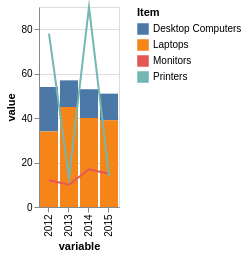

In [20]:
df18 = load_input_table("018.json")

df18 = pd.melt(df18, id_vars='Item', value_vars=["2012", "2013", "2014", "2015"])

print(df18)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "bar",
        "transform": [{"filter": "datum.Item == \"Desktop Computers\" || datum.Item == \"Laptops\""}],
        "encoding": {
            "x": { "field": "variable", "type": "nominal"},
            "y": { "field": "value", "type": "quantitative"},
            "color": {"field": "Item", "type": "nominal"},
        }},{
        "mark": {"type": "line"},
        "transform": [{"filter": "datum.Item != \"Desktop Computers\" && datum.Item != \"Laptops\""}],
        "encoding": {
            "x": { "field": "variable", "type": "nominal"},
            "y": { "field": "value", "type": "quantitative"},
            "color": {"field": "Item", "type": "nominal"},
        }
    }]
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df18)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": "bar",
            "encoding": {
                "x": {
                    "field": "cuts",
                    "type": "ordinal",
                    "sort": "none"
                },
                "y": {
                    "field": "Purchase Amount",
                    "type": "quantitative"
                }
            }
        },
        {
            "mark": "line",
            "encoding": {
                "x": {
                    "field": "cuts",
                    "type": "ordinal",
                    "sort": "none"
                },
                "y": {
                    "field": "csum",
                    "type": "quantitative"
                },
                "order": {
                    "field": "id",
                    "type": "ordinal"
                }
            }
        }
    ],
    "resolve": {
        "scale": {
            "y": "in

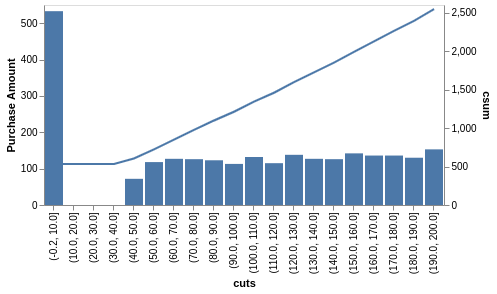

In [21]:
df19 = load_input_table("019.json")

df19["cuts"] = pd.cut(df19['Purchase Amount'], 20)
df19 = df19.groupby(['cuts']).count().reset_index()
df19["csum"] = df19["Purchase Amount"].cumsum()

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "bar",
        "encoding": {
            "x": { "field": "cuts", "type": "ordinal", "sort": "none"},
            "y": { "field": "Purchase Amount", "type": "quantitative"},
        }
    },{
        "mark": "line",
        "encoding": {
            "x": { "field": "cuts", "type": "ordinal", "sort": "none"},
            "y": { "field": "csum", "type": "quantitative"},
            "order": {"field": "id", "type": "ordinal"}
        }
    }],
    "resolve": {"scale": {"y": "independent"}}
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df19)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": {
            "field": "Country",
            "type": "nominal"
        },
        "color": {
            "field": "Product",
            "type": "nominal"
        },
        "y": {
            "field": "Amount",
            "type": "quantitative"
        }
    }
}


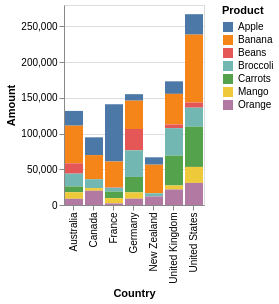

In [22]:
df20 = load_input_table("020.json")

#print(df20)

df20 = df20.groupby(['Product', "Country"])["Amount"].sum().reset_index()

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "Country", "type": "nominal"},
        "color": { "field": "Product", "type": "nominal"},
        "y": { "field": "Amount", "type": "quantitative"},
        #"column": { "field": "Country", "type": "nominal"},
        
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df20)

           Country  Total Result  variable    value
0        Australia         40492     Beans  14433.0
1           Canada         12407     Beans      NaN
2           France         15125     Beans    680.0
3          Germany         88738     Beans  29905.0
4      New Zealand          4390     Beans      NaN
5   United Kingdom         85351     Beans   5100.0
6    United States         90162     Beans   7163.0
8        Australia         40492  Broccoli  17953.0
9           Canada         12407  Broccoli  12407.0
10          France         15125  Broccoli   5341.0
11         Germany         88738  Broccoli  37197.0
12     New Zealand          4390  Broccoli   4390.0
13  United Kingdom         85351  Broccoli  38436.0
14   United States         90162  Broccoli  26715.0
16       Australia         40492   Carrots   8106.0
17          Canada         12407   Carrots      NaN
18          France         15125   Carrots   9104.0
19         Germany         88738   Carrots  21636.0
20     New Z

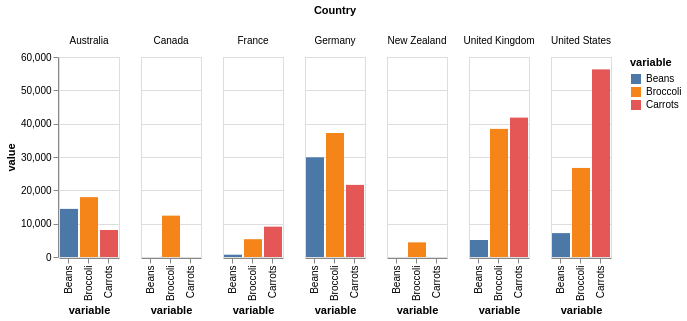

In [23]:
df21 = load_input_table("021.json")

df21 = pd.melt(df21, id_vars=['Country', "Total Result"], value_vars=["Beans", "Broccoli", "Carrots"])
df21 = df21[df21["Country"] != "Total Result"]

print(df21)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "color": { "field": "variable", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "column": { "field": "Country", "type": "nominal"},
        
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df21)

     #  Coverage                       Event  Event_line  Year
0    1        81                                     NaN  1995
1    2        81                                     NaN  1996
2    3        81  Medicaid coverage for kids        81.0  1997
3    4        82                                     NaN  1998
4    5        81      Patient bill of rights        81.0  1999
5    6        82                                     NaN  2000
6    7        85                                     NaN  2001
7    8        85                                     NaN  2002
8    9        84             Medicare Part D        84.0  2003
9   10        83                                     NaN  2004
10  11        83                                     NaN  2005
11  12        83                                     NaN  2006
12  13        84                                     NaN  2007
13  14        83                                     NaN  2008
14  15        83                                     Na

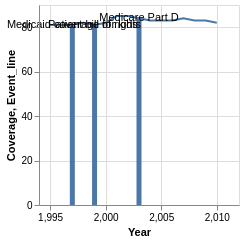

In [24]:
df22 = load_input_table("022.json")

print(df22)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer":[{
        "mark": "line",
        "encoding": {
            "x": { "field": "Year", "type": "quantitative"},
            "y": { "field": "Coverage", "type": "quantitative"}
        }
    },{
        "mark": "bar",
        "encoding": {
            "x": { "field": "Year", "type": "quantitative"},
            "y": { "field": "Event_line", "type": "quantitative"}
        }
    },{
        "mark": "text",
        "encoding": {
            "x": { "field": "Year", "type": "quantitative"},
            "y": { "field": "Event_line", "type": "quantitative"},
            "text": { "field": "Event", "type": "nominal"},
        }
    }]
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df22)

   Duration           Parts Start Date  id   End Date
0        10      Foundation 2000-06-01   0 2000-06-11
1         7           Walls 2000-06-12   1 2000-06-19
2        10            Roof 2000-06-20   2 2000-06-30
3         5  Windows, Doors 2000-07-01   3 2000-07-06
4         3        Plumbing 2000-07-07   4 2000-07-10
5         3        Electric 2000-07-07   5 2000-07-10
6         2        Painting 2000-07-11   6 2000-07-13
7         2        Flooring 2000-07-13   7 2000-07-15
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "y": {
            "field": "Parts",
            "type": "nominal",
            "sort": "null"
        },
        "x": {
            "field": "Start Date",
            "type": "temporal"
        },
        "x2": {
            "field": "End Date",
            "type": "temporal"
        }
    }
}


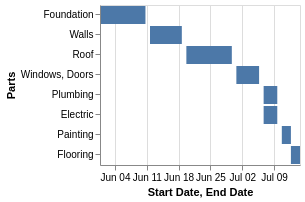

In [25]:
df24 = load_input_table("024.json")

df24['id'] = df24.index
df24["Start Date"] = pd.to_datetime(df24["Start Date"], infer_datetime_format=True)
df24["End Date"] = df24["Start Date"] + pd.TimedeltaIndex(df24['Duration'], unit="D")

print(df24)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "y": { "field": "Parts", "type": "nominal", "sort": "null"},
        "x": { "field": "Start Date", "type": "temporal"},
        "x2": { "field": "End Date", "type": "temporal"}
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df24)

      Complaint Type  Count  cumsum
1         Overpriced    789     789
9     Small portions    621    1410
7          Wait time    109    1519
2  Food is tasteless     65    1584
8      No atmosphere     45    1629
5          Not clean     30    1659
0          Too noisy     27    1686
4  Food is too salty     15    1701
6   Unfriendly staff     12    1713
3     Food not fresh      9    1722
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": "bar",
            "encoding": {
                "x": {
                    "field": "Complaint Type",
                    "type": "nominal",
                    "sort": null
                },
                "y": {
                    "field": "Count",
                    "type": "quantitative"
                }
            }
        },
        {
            "mark": {
                "type": "line",
                "color": "red"
            },
            "encoding": {
              

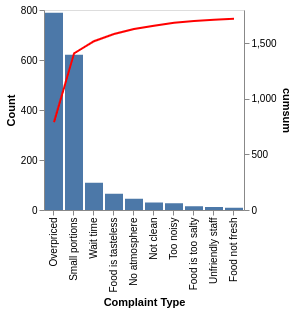

In [26]:
df25 = load_input_table("025.json")

df25 = df25.sort_values(by='Count', ascending=False)
df25["cumsum"] = df25["Count"].cumsum()

print(df25)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer":[{
        "mark": "bar",
        "encoding": {
            "x": { "field": "Complaint Type", "type": "nominal", "sort": None},
            "y": { "field": "Count", "type": "quantitative"}
        }
    },{
        "mark": {"type": "line", "color": "red"},
        "encoding": {
            "x": { "field": "Complaint Type", "type": "nominal", "sort": None},
            "y": { "field": "cumsum", "type": "quantitative"},
            "order": { "field": "id", "type": "ordinal"}
        }
    }],
  "resolve": {"scale": {"y": "independent"}}
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df25)

[{'Period': 'Actual', 'variable': 0, 'value': '120'}, {'Period': 'Interval = 2', 'variable': 0, 'value': '#N/A'}, {'Period': 'Interval = 4', 'variable': 0, 'value': '#N/A'}, {'Period': 'Interval = 6', 'variable': 0, 'value': '#N/A'}, {'Period': 'Actual', 'variable': 1, 'value': '150'}, {'Period': 'Interval = 2', 'variable': 1, 'value': '135'}, {'Period': 'Interval = 4', 'variable': 1, 'value': '#N/A'}, {'Period': 'Interval = 6', 'variable': 1, 'value': '#N/A'}, {'Period': 'Actual', 'variable': 2, 'value': '240'}, {'Period': 'Interval = 2', 'variable': 2, 'value': '195'}, {'Period': 'Interval = 4', 'variable': 2, 'value': '#N/A'}, {'Period': 'Interval = 6', 'variable': 2, 'value': '#N/A'}, {'Period': 'Actual', 'variable': 3, 'value': '540'}, {'Period': 'Interval = 2', 'variable': 3, 'value': '390'}, {'Period': 'Interval = 4', 'variable': 3, 'value': '262.5'}, {'Period': 'Interval = 6', 'variable': 3, 'value': '#N/A'}, {'Period': 'Actual', 'variable': 4, 'value': '210'}, {'Period': 'Inte

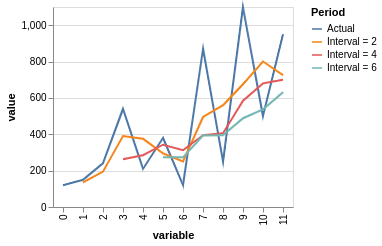

In [27]:
df27 = load_input_table("027.json")

df27 = pd.melt(df27, id_vars=['Period'], value_vars=["0", "1", "2", "3", "4", '5', '6', "7", "8", "9", "10", "11"])
df27 = load_and_clean_table(df27)
print(df27)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "variable", "type": "ordinal"},
        "y": { "field": "value", "type": "quantitative"},
        "color": { "field": "Period", "type": "nominal"},
    }
   
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df27)

        cuts  Number of students
0    (0, 20]                   1
1   (20, 25]                   8
2   (25, 30]                   2
3   (30, 35]                   2
4   (35, 40]                   3
5  (40, 100]                   2
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": {
            "field": "cuts",
            "type": "nominal"
        },
        "y": {
            "field": "Number of students",
            "type": "quantitative"
        }
    }
}


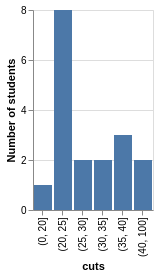

In [28]:
df28 = load_input_table("028.json")

df28["cuts"] = pd.cut(df28['Number of students'], [0, 20, 25, 30, 35, 40, 100])
df28 = df28.groupby(['cuts']).count().reset_index()

print(df28)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "cuts", "type": "nominal"},
        "y": { "field": "Number of students", "type": "quantitative"},
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df28)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "point",
    "encoding": {
        "x": {
            "field": "value",
            "type": "quantitative"
        },
        "y": {
            "field": "variable",
            "type": "nominal"
        },
        "size": {
            "field": "Archery",
            "type": "nominal"
        }
    }
}


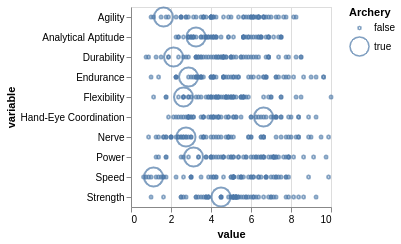

In [29]:
df29 = load_input_table("029.json")

df29 = pd.melt(df29, id_vars=['Sport', "Rank"], value_vars=["Endurance", "Strength", "Power", "Speed", "Agility", "Flexibility", "Nerve", "Durability", "Hand-Eye Coordination", "Analytical Aptitude"])
df29["Archery"] = df29["Sport"] == "Archery"

#print(df29)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "point",
    "encoding": {
        "x": { "field": "value", "type": "quantitative"},
        "y": { "field": "variable", "type": "nominal"},
        "size": {"field": "Archery", 'type': "nominal"}
    }
   
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df29)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "y": {
            "field": "value",
            "type": "quantitative"
        },
        "column": {
            "field": "variable",
            "type": "nominal"
        },
        "size": {
            "field": "Archery",
            "type": "nominal"
        }
    }
}


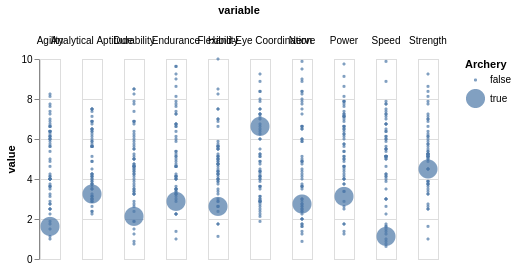

In [30]:
df30 = load_input_table("030.json")

df30 = pd.melt(df30, id_vars=['Sport', "Rank"], 
                     value_vars=["Endurance", "Strength", "Power", "Speed", "Agility", "Flexibility", "Nerve", "Durability", "Hand-Eye Coordination", "Analytical Aptitude"])
df30["Archery"] = df30["Sport"] == "Archery"

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "y": { "field": "value", "type": "quantitative"},
        "column": {"field": "variable", 'type': "nominal"},
        "size": {"field": "Archery", 'type': "nominal"}
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df30)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "x": {
            "field": "Performance Rating",
            "type": "nominal"
        },
        "color": {
            "field": "Performance Rating",
            "type": "nominal"
        },
        "column": {
            "field": "Group Name",
            "type": "nominal"
        },
        "y": {
            "field": "Salary Increase $",
            "type": "quantitative"
        }
    }
}


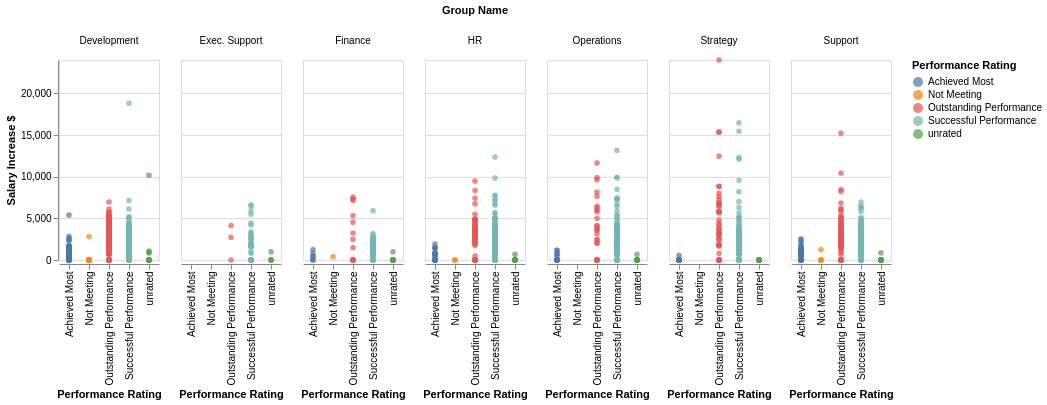

In [31]:
df31 = load_input_table("031.json")

#print(df31)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "x": { "field": "Performance Rating", "type": "nominal"},
        "color": { "field": "Performance Rating", "type": "nominal"},
        "column": {"field": "Group Name", 'type': "nominal"},
        "y": {"field": "Salary Increase $", 'type': "quantitative"}
    }
   
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df31)

                               activity variable     value
0                     Playing billiards        0  0.000032
1                               Dancing        0  0.000168
2                              Softball        0  0.000000
3                               Bowling        0  0.000012
4                    Playing volleyball        0  0.000000
5         Participating in martial arts        0  0.000000
6                Playing racquet sports        0  0.000000
7                                Biking        0  0.000000
8       Weightlifting/strength training        0  0.000026
9                            Doing yoga        0  0.000005
10                       Playing soccer        0  0.000000
11                     Playing football        0  0.000000
12                   Playing basketball        0  0.000000
13                     Playing baseball        0  0.000000
14                              Hunting        0  0.000026
15               Vehicle touring/racing        0  0.0000

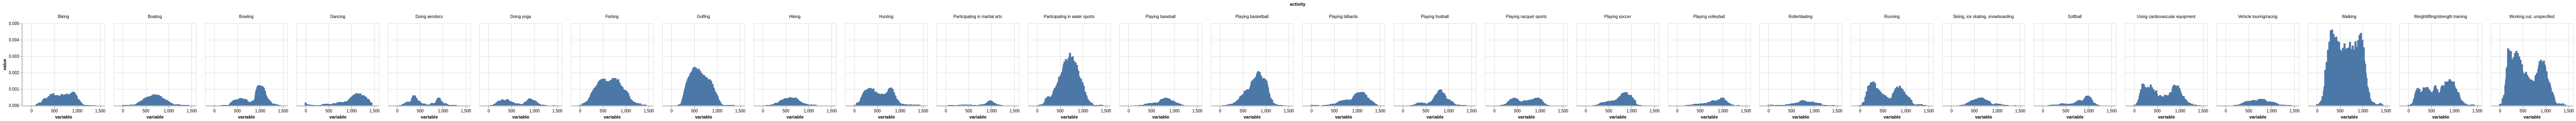

In [32]:
df33 = load_input_table("033.json")

df33 = pd.melt(df33, id_vars="activity", value_vars=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', '105', '110', '115', '120', '125', '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200', '205', '210', '215', '220', '225', '230', '235', '240', '245', '250', '255', '260', '265', '270', '275', '280', '285', '290', '295', '300', '305', '310', '315', '320', '325', '330', '335', '340', '345', '350', '355', '360', '365', '370', '375', '380', '385', '390', '395', '400', '405', '410', '415', '420', '425', '430', '435', '440', '445', '450', '455', '460', '465', '470', '475', '480', '485', '490', '495', '500', '505', '510', '515', '520', '525', '530', '535', '540', '545', '550', '555', '560', '565', '570', '575', '580', '585', '590', '595', '600', '605', '610', '615', '620', '625', '630', '635', '640', '645', '650', '655', '660', '665', '670', '675', '680', '685', '690', '695', '700', '705', '710', '715', '720', '725', '730', '735', '740', '745', '750', '755', '760', '765', '770', '775', '780', '785', '790', '795', '800', '805', '810', '815', '820', '825', '830', '835', '840', '845', '850', '855', '860', '865', '870', '875', '880', '885', '890', '895', '900', '905', '910', '915', '920', '925', '930', '935', '940', '945', '950', '955', '960', '965', '970', '975', '980', '985', '990', '995', '1000', '1005', '1010', '1015', '1020', '1025', '1030', '1035', '1040', '1045', '1050', '1055', '1060', '1065', '1070', '1075', '1080', '1085', '1090', '1095', '1100', '1105', '1110', '1115', '1120', '1125', '1130', '1135', '1140', '1145', '1150', '1155', '1160', '1165', '1170', '1175', '1180', '1185', '1190', '1195', '1200', '1205', '1210', '1215', '1220', '1225', '1230', '1235', '1240', '1245', '1250', '1255', '1260', '1265', '1270', '1275', '1280', '1285', '1290', '1295', '1300', '1305', '1310', '1315', '1320', '1325', '1330', '1335', '1340', '1345', '1350', '1355', '1360', '1365', '1370', '1375', '1380', '1385', '1390', '1395', '1400', '1405', '1410', '1415', '1420', '1425', '1430', '1435'])

print(df33)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "variable", "type": "quantitative"},
        "column": {"field": "activity", 'type': "nominal"},
        "y": {"field": "value", 'type': "quantitative"}
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df33)

   Timeline                variable    value
11   Jun-16                Forecast     1097
12   Jul-16                Forecast  939.925
13   Aug-16                Forecast  924.496
14   Sep-16                Forecast  909.067
26   Jun-16  Lower Confidence Bound     1097
27   Jul-16  Lower Confidence Bound -1913.98
28   Aug-16  Lower Confidence Bound -1952.33
29   Sep-16  Lower Confidence Bound -1990.86
41   Jun-16  Upper Confidence Bound     1097
42   Jul-16  Upper Confidence Bound  3793.83
43   Aug-16  Upper Confidence Bound  3801.32
44   Sep-16  Upper Confidence Bound  3808.99
45   Jul-15                  Values      436
46   Aug-15                  Values      500
47   Sep-15                  Values      805
48   Oct-15                  Values     5124
49   Nov-15                  Values     1674
50   Dec-15                  Values      300
51   Jan-16                  Values      265
52   Feb-16                  Values      742
53   Mar-16                  Values     1955
54   Apr-1

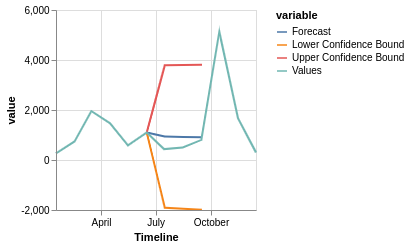

In [33]:
df34 = load_input_table("034.json")

df34 = pd.melt(df34, id_vars="Timeline", value_vars=["Forecast", "Lower Confidence Bound", "Upper Confidence Bound", "Values"])
df34 = df34[df34["value"] != ""]

print(df34)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "Timeline", "type": "temporal"},
        "color": {"field": "variable", 'type': "nominal"},
        "y": {"field": "value", 'type': "quantitative"}
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df34)

   DATA variable  value
0     A    Lower     80
1     B    Lower    103
2     C    Lower    106
3     D    Lower     75
4     E    Lower     85
5     A    Upper    116
6     B    Upper    138
7     C    Upper    157
8     D    Upper     85
9     E    Upper    102
10    A    Value    100
11    B    Value    120
12    C    Value    140
13    D    Value     80
14    E    Value     90
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {
                "type": "bar",
                "opacity": 0.5
            },
            "transform": [
                {
                    "filter": "datum.variable == \"Value\""
                }
            ],
            "encoding": {
                "x": {
                    "field": "DATA",
                    "type": "nominal"
                },
                "y": {
                    "field": "value",
                    "type": "quantitative"
                }
            }
       

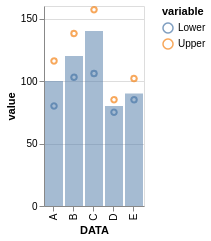

In [34]:
df35 = load_input_table("035.json")
df35 = pd.melt(df35, id_vars=["DATA"], value_vars=["Lower", "Upper", "Value"])
print(df35)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
          "mark": {"type": "bar", "opacity": 0.5},
          "transform": [{"filter": "datum.variable == \"Value\""}],
          "encoding": { "x": {"field": "DATA", "type": "nominal"},
                        "y": { "field": "value", "type": "quantitative" }}
        },
        {
          "mark": {"type": "point"},
          "transform": [{"filter": "datum.variable != \"Value\""}],
          "encoding": {
            "x": {"field": "DATA", "type": "nominal"},
            "y": {"field": "value", "type": "quantitative"},
            "color": {"field": "variable", "type": "nominal"}
          }
        }
    ]
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df35)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "area",
    "encoding": {
        "x": {
            "field": "Date",
            "type": "temporal"
        },
        "y": {
            "field": "value",
            "type": "quantitative"
        },
        "color": {
            "field": "color",
            "type": "nominal"
        },
        "column": {
            "field": "variable",
            "type": "nominal"
        }
    }
}


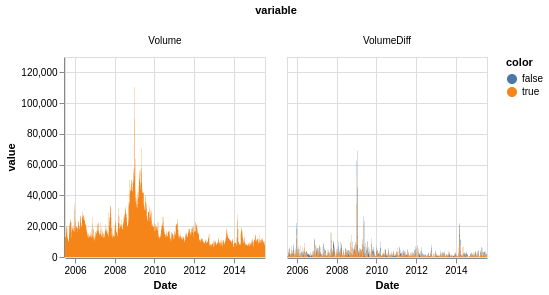

In [35]:
df36 = load_input_table("036.json")
df36["VolumeDiff"] = df36["Volume"].diff()
df36 = pd.melt(df36, id_vars=["Close", "Date"], value_vars=["VolumeDiff", "Volume"])
df36["color"] = df36['value'] > 0
df36["value"] = df36["value"].abs()

#print(df36.to_json(orient="records"))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
      "mark": "area",
      "encoding": {
        "x": {"field": "Date", "type": "temporal"},
        "y": {"field": "value", "type": "quantitative"},
        "color": {"field": "color", "type": "nominal"},
        "column": {"field": "variable", "type": "nominal" }
      }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df36)

    TOTAL                     Category variable     value
0     645              HOME APPLIANCES    <-10% -0.300775
1     568                    COMPUTERS    <-10% -0.306338
2     355         CAMERAS & CAMCORDERS    <-10% -0.309859
3     265                  CELL PHONES    <-10% -0.301887
4     205                   TV & VIDEO    <-10% -0.302439
5     166                 GAMES & TOYS    <-10% -0.391566
6     100                        AUDIO    <-10% -0.340000
7      90  MUSIC, MOVIES & AUDIO BOOKS    <-10% -0.166667
8     645              HOME APPLIANCES      <0% -0.215504
9     568                    COMPUTERS      <0% -0.207746
10    355         CAMERAS & CAMCORDERS      <0% -0.264789
11    265                  CELL PHONES      <0% -0.237736
12    205                   TV & VIDEO      <0% -0.219512
13    166                 GAMES & TOYS      <0% -0.204819
14    100                        AUDIO      <0% -0.190000
15     90  MUSIC, MOVIES & AUDIO BOOKS      <0% -0.288889
16    645     

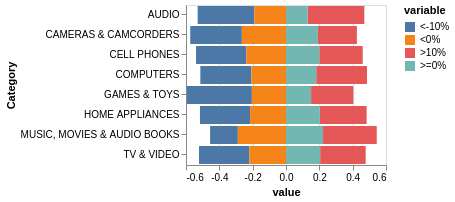

In [36]:
df37 = load_input_table("037.json")

df37 = pd.melt(df37, id_vars=["TOTAL", "Category"], value_vars=["<-10%", "<0%", ">10%", ">=0%"])
df37['value'].mask(df37['variable'] == "<-10%", -df37["value"], inplace=True)
df37['value'].mask(df37['variable'] == "<0%", -df37["value"], inplace=True)

df37["value"] = df37["value"] / df37["TOTAL"]

print(df37)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "Category", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative"}    
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df37)

[{"Job Type":"Accountant","left":22880.0,"right":64737.1904761905,"label":"lower"},{"Job Type":"Analyst","left":10000.0,"right":62583.7373737374,"label":"lower"},{"Job Type":"CXO or Top Mgmt.","left":16000.0,"right":125615.3846153846,"label":"lower"},{"Job Type":"Consultant","left":12000.0,"right":98388.8888888889,"label":"lower"},{"Job Type":"Controller","left":24000.0,"right":87813.2352941177,"label":"lower"},{"Job Type":"Engineer","left":24000.0,"right":72056.1538461538,"label":"lower"},{"Job Type":"Manager","left":15000.0,"right":77581.7103448276,"label":"lower"},{"Job Type":"Misc.","left":74461.0,"right":83820.3333333333,"label":"lower"},{"Job Type":"Reporting","left":32000.0,"right":58200.0,"label":"lower"},{"Job Type":"Specialist","left":31000.0,"right":69800.0,"label":"lower"},{"Job Type":"Accountant","left":64737.1904761905,"right":150000.0,"label":"higher"},{"Job Type":"Analyst","left":62583.7373737374,"right":160000.0,"label":"higher"},{"Job Type":"CXO or Top Mgmt.","left":1

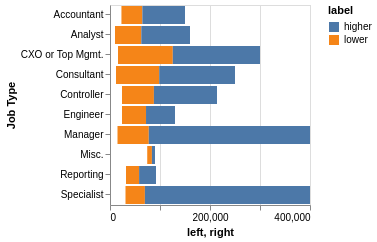

In [37]:
df38 = load_input_table("038.json")

df38_0 = df38.groupby("Job Type")['Salary in USD'].mean()
df38_1 = df38.groupby("Job Type")['Salary in USD'].max()
df38_2 = df38.groupby("Job Type")['Salary in USD'].min()

df38 = pd.concat([df38_0, df38_1, df38_2], axis=1).reset_index()
df38.columns = ["Job Type", "mean", "max", "min"]

df38_r = df38[["Job Type", "mean", "max"]]
df38_r.columns=["Job Type", "left", "right"]
df38_r["label"] = "higher"

df38_l = df38[["Job Type", "min", "mean"]]
df38_l.columns=["Job Type", "left", "right"]
df38_l["label"] = "lower"

df38 = pd.concat([df38_l, df38_r])

print(df38.to_json(orient="records"))

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "y": {"field": "Job Type", "type": "nominal"},
        "x": { "field": "left", "type": "quantitative"},
        "x2": { "field": "right", "type": "quantitative"},
        "color":{"field": "label", "type": "nominal"}
    }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df38)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "boxplot",
        "extent": "min-max"
    },
    "encoding": {
        "x": {
            "field": "Salary in USD",
            "type": "quantitative"
        },
        "y": {
            "field": "Job Type",
            "type": "nominal"
        }
    }
}


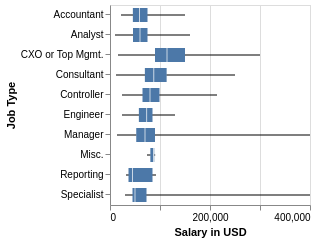

In [38]:
df38 = load_input_table("038.json")

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "boxplot",
    "extent": "min-max"
  },
  "encoding": {
    "x": {"field": "Salary in USD","type": "quantitative"},
    "y": {
      "field": "Job Type",
      "type": "nominal",
    }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df38)

    Year    loc  Bisc  Choc
0   2007  NORTH   6.0  14.0
1   2007  SOUTH   4.0  10.0
2   2007   WEST   4.0   6.0
3   2008  NORTH   6.7  18.0
4   2008  SOUTH   5.0  11.0
5   2008   WEST   5.0  10.0
6   2009  NORTH   7.0  19.0
7   2009  SOUTH   5.7  14.0
8   2009   WEST   5.7  12.0
9   2010  NORTH   8.0  21.0
10  2010  SOUTH   6.0  16.0
11  2010   WEST   6.0  15.0
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "area"
    },
    "encoding": {
        "x": {
            "field": "Year",
            "type": "ordinal"
        },
        "y": {
            "field": "Bisc",
            "type": "quantitative"
        },
        "y2": {
            "field": "Choc",
            "type": "quantitative"
        },
        "column": {
            "field": "loc",
            "type": "nominal"
        }
    }
}


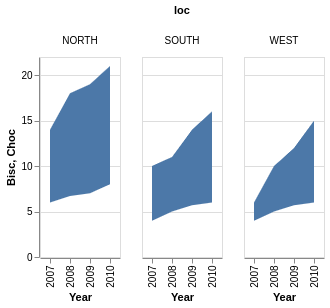

In [39]:
df39 = load_input_table("039.json")

df39 = pd.melt(df39, id_vars=["Year"], 
               value_vars=["NORTH-Bisc", "NORTH-Choc", "SOUTH-Bisc", "SOUTH-Choc", "WEST-Bisc", "WEST-Choc"])
split_col = df39["variable"].str.split("-", expand=True)
df39["loc"] = split_col[0]
df39["type"] = split_col[1]
df39 = df39.pivot_table(index=["Year", "loc"], columns='type', values=['value']).reset_index()
df39.columns = ["Year", "loc", "Bisc", "Choc"]

print(df39)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "area"
  },
  "encoding": {
    "x": {"field": "Year","type": "ordinal"},
    "y": { "field": "Bisc", "type": "quantitative" },
    "y2": { "field": "Choc", "type": "quantitative" },
    "column": { "field": "loc", "type": "nominal" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df39)

    Value Win / Loss  id  end  start
0      10        Win   0   10      0
1       2       Loss   1   12     10
2      12        Win   2   24     12
3       4       Loss   3   28     24
4       5        Win   4   33     28
5      16       Loss   5   49     33
6       9        Win   6   58     49
7      18       Loss   7   76     58
8      12        Win   8   88     76
9       3       Loss   9   91     88
10      4        Win  10   95     91
11      4       Loss  11   99     95
12      1        Win  12  100     99
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "encoding": {
        "x": {
            "field": "start",
            "type": "quantitative"
        },
        "x2": {
            "field": "end",
            "type": "quantitative"
        },
        "color": {
            "field": "Win / Loss",
            "type": "nominal"
        },
        "y": {
            "field": "Win / Loss",
            "type": "nomina

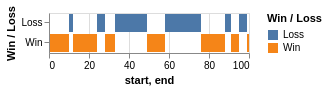

In [40]:
df40 = load_input_table("040.json")
df40["id"] = df40.index

df40["end"] = df40["Value"].cumsum()
df40["start"] = df40["end"] - df40["Value"]

print(df40)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "start","type": "quantitative"},
    "x2": {"field": "end","type": "quantitative"},
    "color": { "field": "Win / Loss", "type": "nominal" },
    "y": { "field": "Win / Loss", "type": "nominal" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df40)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "line"
    },
    "encoding": {
        "x": {
            "field": "Year",
            "type": "ordinal"
        },
        "color": {
            "field": "variable",
            "type": "nominal"
        },
        "y": {
            "field": "value",
            "type": "quantitative"
        }
    }
}


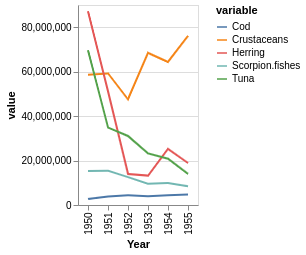

In [41]:
df41 = load_input_table("041.json")

df41 = pd.melt(df41, id_vars='Year', value_vars=["Cod", "Crustaceans", "Herring", "Scorpion.fishes", "Tuna"])

# print(df41.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "line"
  },
  "encoding": {
    "x": {"field": "Year", "type": "ordinal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df41)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "line"
    },
    "encoding": {
        "x": {
            "field": "date",
            "type": "ordinal"
        },
        "color": {
            "field": "variable",
            "type": "nominal"
        },
        "y": {
            "field": "value",
            "type": "quantitative"
        }
    }
}


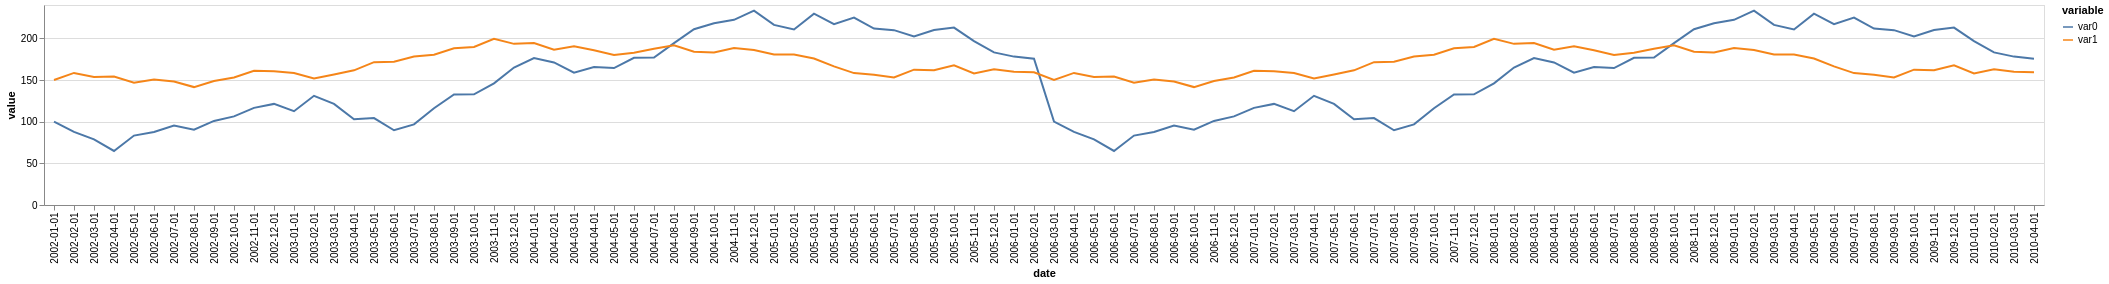

In [42]:
df42 = load_input_table("042.json")

df42 = pd.melt(df42, id_vars='date', value_vars=["var0", "var1"])

#print(df42.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "line"
  },
  "encoding": {
    "x": {"field": "date", "type": "ordinal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df42)

   variable      value  depth  price  table   x   y   z  carat
0   clarity         I1      3      3      3   3   3   3      3
1   clarity         IF      1      1      1   1   1   1      1
2   clarity        SI1     19     19     19  19  19  19     19
3   clarity        SI2     25     25     25  25  25  25     25
4   clarity        VS1     10     10     10  10  10  10     10
5   clarity        VS2     24     24     24  24  24  24     24
6   clarity       VVS1      8      8      8   8   8   8      8
7   clarity       VVS2     10     10     10  10  10  10     10
8     color          D     11     11     11  11  11  11     11
9     color          E     12     12     12  12  12  12     12
10    color          F     16     16     16  16  16  16     16
11    color          G     23     23     23  23  23  23     23
12    color          H     15     15     15  15  15  15     15
13    color          I     12     12     12  12  12  12     12
14    color          J     11     11     11  11  11  11

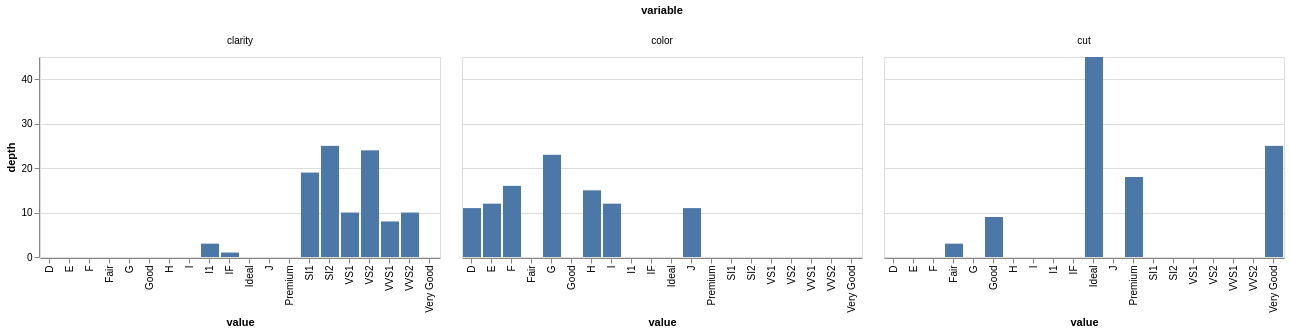

In [43]:
df43 = load_input_table("043.json")

df43 = pd.melt(df43, id_vars=["depth", "price", "table", "x", "y", "z", "carat"], value_vars=["clarity", "color", "cut"])
df43 = df43.groupby(['variable', "value"]).count().reset_index()

print(df43)

#print(df43.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "value", "type": "nominal"},
    "column": { "field": "variable", "type": "nominal" },
    "y": { "field": "depth", "type": "quantitative" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df43)

       Species      variable  value
0       setosa  Petal.Length  1.462
1       setosa   Petal.Width  0.246
2       setosa  Sepal.Length  5.006
3       setosa   Sepal.Width  3.428
4   versicolor  Petal.Length  4.260
5   versicolor   Petal.Width  1.326
6   versicolor  Sepal.Length  5.936
7   versicolor   Sepal.Width  2.770
8    virginica  Petal.Length  5.552
9    virginica   Petal.Width  2.026
10   virginica  Sepal.Length  6.588
11   virginica   Sepal.Width  2.974
[{"Species":"setosa","variable":"Petal.Length","value":1.462},{"Species":"setosa","variable":"Petal.Width","value":0.246},{"Species":"setosa","variable":"Sepal.Length","value":5.006},{"Species":"setosa","variable":"Sepal.Width","value":3.428},{"Species":"versicolor","variable":"Petal.Length","value":4.26},{"Species":"versicolor","variable":"Petal.Width","value":1.326},{"Species":"versicolor","variable":"Sepal.Length","value":5.936},{"Species":"versicolor","variable":"Sepal.Width","value":2.77},{"Species":"virginica","variable"

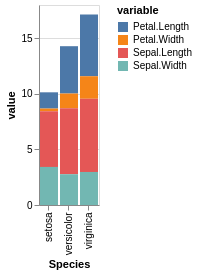

In [44]:
df44 = load_input_table("044.json")

df44 = pd.melt(df44, id_vars=["Species"], value_vars=["Petal.Length","Petal.Width","Sepal.Length","Sepal.Width"])
df44 = df44.groupby(['Species', "variable"]).mean().reset_index()

print(df44)

print(df44.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "Species", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df44)

               X1 variable  value
0       Diversity       B1    5.1
1    Endangerment       B1    4.9
2   Marketability       B1    4.7
3           Total       B1    4.6
4       Diversity       B2    3.5
5    Endangerment       B2    3.0
6   Marketability       B2    3.2
7           Total       B2    3.1
8       Diversity       B3    1.4
9    Endangerment       B3    1.4
10  Marketability       B3    1.3
11          Total       B3    1.5
12      Diversity       B4    7.1
13   Endangerment       B4    4.7
14  Marketability       B4    3.2
15          Total       B4    5.1
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "encoding": {
        "x": {
            "field": "X1",
            "type": "nominal"
        },
        "color": {
            "field": "variable",
            "type": "nominal"
        },
        "y": {
            "field": "value",
            "type": "quantitative"
        }
    }
}


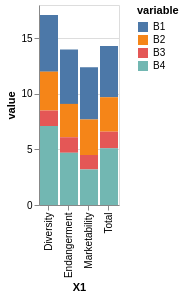

In [45]:
df45 = load_input_table("045.json")

df45 = pd.melt(df45, id_vars=["X1"], value_vars=["B1", "B2", "B3", "B4"])

print(df45)

#print(df45.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "X1", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df45)

          date    Y2K variable  value
0   2012-07-01  False  psavert    6.6
1   2001-09-01  False  psavert    6.3
2   2011-08-01  False  psavert    6.2
3   2005-07-01  False  psavert    1.9
4   1989-05-01   True  psavert    7.6
5   1985-03-01   True  psavert    8.1
6   1989-08-01   True  psavert    7.1
7   2008-11-01  False  psavert    6.3
8   2014-01-01  False  psavert    4.9
9   1987-09-01   True  psavert    7.0
10  2006-06-01  False  psavert    3.4
11  1992-07-01   True  psavert    9.1
12  1976-07-01   True  psavert   11.2
13  1973-06-01   True  psavert   13.2
14  1967-09-01   True  psavert   11.7
15  1995-06-01   True  psavert    6.1
16  1980-07-01   True  psavert   10.5
17  1970-01-01   True  psavert   11.7
18  1967-08-01   True  psavert   12.5
19  1995-08-01   True  psavert    6.1
20  1996-10-01   True  psavert    5.8
21  2012-09-01  False  psavert    6.5
22  2006-10-01  False  psavert    3.1
23  1994-07-01   True  psavert    6.4
24  2008-05-01  False  psavert    7.9
25  1975-10-

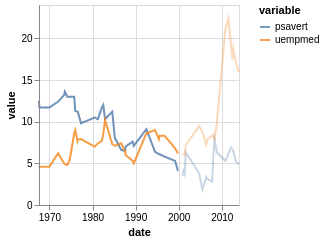

In [46]:
df46 = load_input_table("046.json")

df46["Y2K"] = pd.to_datetime(df46['date']).dt.year < 2000
df46 = pd.melt(df46, id_vars=["date", "Y2K"], value_vars=["psavert", "uempmed"])

print(df46)

print(df46.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "line" },
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "color": { "field": "variable", "type": "nominal" },
    "strokeOpacity": { "field": "Y2K", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df46)

     label variable  value
0   Label1       ok    0.0
1   Label2       ok    0.5
2   Label3       ok    0.4
3   Label4       ok    0.9
4   Label5       ok    0.4
5   Label6       ok    0.9
6   Label7       ok    0.8
7   Label8       ok    0.8
8   Label1      err    1.0
9   Label2      err    0.5
10  Label3      err    0.6
11  Label4      err    0.1
12  Label5      err    0.6
13  Label6      err    0.1
14  Label7      err    0.2
15  Label8      err    0.2
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "encoding": {
        "x": {
            "field": "label",
            "type": "nominal"
        },
        "color": {
            "field": "variable",
            "type": "nominal"
        },
        "y": {
            "field": "value",
            "type": "quantitative"
        }
    }
}


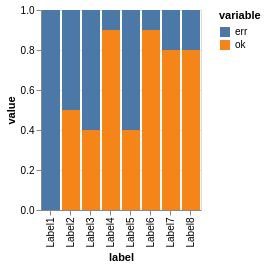

In [47]:
df47 = load_input_table("047.json")

df47["err"] = 1 - df47['ok']
df47 = pd.melt(df47, id_vars=["label"], value_vars=["ok", "err"])

print(df47)

#print(df47.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar" },
  "encoding": {
    "x": {"field": "label", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df47)

  category  totalABC variable     value
0   group1        17        A  0.117647
1   group2       163        A  0.233129
2   group1        17        B  0.823529
3   group2       163        B  0.705521
4   group1        17        C  0.058824
5   group2       163        C  0.061350
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "encoding": {
        "x": {
            "field": "category",
            "type": "nominal"
        },
        "color": {
            "field": "variable",
            "type": "nominal"
        },
        "y": {
            "field": "value",
            "type": "quantitative"
        }
    }
}


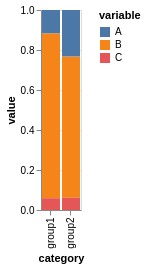

In [48]:
df48 = load_input_table("048.json")

df48 = df48.groupby("category").sum().reset_index()
df48 = pd.melt(df48, id_vars=["category", "totalABC"], value_vars=["A", "B", "C"])
df48["value"] = df48["value"] / df48["totalABC"]

print(df48)

#print(df48.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar" },
  "encoding": {
    "x": {"field": "category", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df48)

scenario1    row  drain  measured  simulated
0            0.5   None      40.0       41.0
1            0.5  drain      40.0       39.9
2            0.8   None      55.0       56.0
3            0.8  drain      55.0       55.3
4          adj21   None      23.0       22.0
5          adj21  drain      23.0       23.4
6          adj22   None      27.0       27.5
7          adj22  drain      27.0       27.2
8          raw21   None      55.0       54.0
9          raw21  drain      55.0       54.5
10         raw22   None      60.0       59.0
11         raw22  drain      60.0       60.2
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "point"
    },
    "encoding": {
        "x": {
            "field": "measured",
            "type": "nominal"
        },
        "color": {
            "field": "row",
            "type": "nominal"
        },
        "y": {
            "field": "simulated",
            "type": "quantitative"
        },
        "col

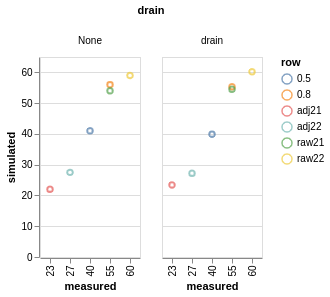

In [49]:
import numpy as np

df49 = load_input_table("049-2.json")

splits = pd.DataFrame(df49["scenario"].str.split('_', 2).tolist(), columns = ['scenario1','row', "drain"])
df49 = pd.concat([df49, splits], axis=1).reset_index()
df49["drain"] = np.where(df49["drain"] == "drain", "drain", "None")
df49 = df49.pivot_table(index=["row", "drain"], columns='scenario1', values='value').reset_index()

print(df49)

#print(df49.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point" },
  "encoding": {
    "x": {"field": "measured", "type": "nominal"},
    "color": { "field": "row", "type": "nominal" },
    "y": { "field": "simulated", "type": "quantitative" },
    "column": { "field": "drain", "type": "nominal" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df49)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "boxplot",
        "extent": "min-max"
    },
    "encoding": {
        "x": {
            "field": "ing",
            "type": "nominal"
        },
        "color": {
            "field": "ing",
            "type": "nominal"
        },
        "y": {
            "field": "mg",
            "type": "quantitative"
        },
        "column": {
            "field": "prod",
            "type": "nominal"
        }
    }
}


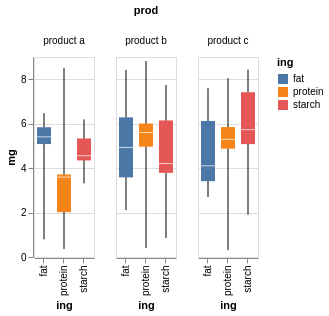

In [50]:
df50 = load_input_table("050.json")

#print(df50)

#print(df50.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "boxplot", "extent": "min-max"},
  "encoding": {
    "x": {"field": "ing", "type": "nominal"},
    "color": { "field": "ing", "type": "nominal" },
    "y": { "field": "mg", "type": "quantitative" },
    "column": { "field": "prod", "type": "nominal" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df50)

Feature  Condition Sex   A  Aneg         p
0                1   F   2     5  0.285714
1                1   M   6     1  0.857143
2                2   F   3     6  0.333333
3                2   M   4     2  0.666667
4                3   F   4     9  0.307692
5                3   M  10     6  0.625000
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "encoding": {
        "x": {
            "field": "Condition",
            "type": "nominal"
        },
        "color": {
            "field": "Condition",
            "type": "nominal"
        },
        "y": {
            "field": "p",
            "type": "quantitative"
        },
        "column": {
            "field": "Sex",
            "type": "nominal"
        }
    }
}


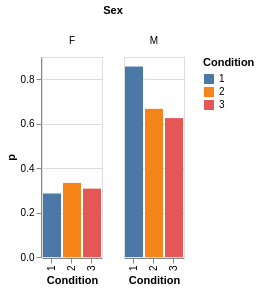

In [51]:
df51 = load_input_table("051.json")

df51 = df51.pivot_table(index=["Condition", "Sex"], columns='Feature', values='value').reset_index()

df51["p"] = df51["A"] / (df51["A"] + df51["Aneg"])

print(df51)

#print(df51.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "x": {"field": "Condition", "type": "nominal"},
    "color": { "field": "Condition", "type": "nominal" },
    "y": { "field": "p", "type": "quantitative" },
    "column": { "field": "Sex", "type": "nominal" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df51)

       Car Country  Value
0  Audi A6      US     23
1  Audi A6      UK     12
2  Audi A6      DE     19
3   BMW X5      UK      8
4   BMW X5      DE      5
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "encoding": {
        "x": {
            "field": "Country",
            "type": "nominal"
        },
        "color": {
            "field": "Country",
            "type": "nominal"
        },
        "y": {
            "field": "Value",
            "type": "quantitative"
        },
        "column": {
            "field": "Car",
            "type": "nominal"
        }
    }
}


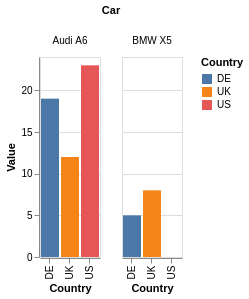

In [52]:
df52 = load_input_table("052.json")
#no transformation

print(df52)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "x": {"field": "Country", "type": "nominal"},
    "color": { "field": "Country", "type": "nominal" },
    "y": { "field": "Value", "type": "quantitative" },
    "column": { "field": "Car", "type": "nominal" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df52)

   classes    date  score
0  english  9/1/11      1
1  english  9/2/11      1
2  english  9/5/11      2
3   french  9/1/11      2
4   french  9/2/11      1
5   french  9/5/11      1
6  spanish  9/1/11      1
7  spanish  9/3/11      2
8  spanish  9/5/11      1
[{"classes":"english","date":"9\/1\/11","score":1},{"classes":"english","date":"9\/2\/11","score":1},{"classes":"english","date":"9\/5\/11","score":2},{"classes":"french","date":"9\/1\/11","score":2},{"classes":"french","date":"9\/2\/11","score":1},{"classes":"french","date":"9\/5\/11","score":1},{"classes":"spanish","date":"9\/1\/11","score":1},{"classes":"spanish","date":"9\/3\/11","score":2},{"classes":"spanish","date":"9\/5\/11","score":1}]
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "encoding": {
        "y": {
            "field": "date",
            "type": "nominal"
        },
        "color": {
            "field": "classes",
            "type": "nomin

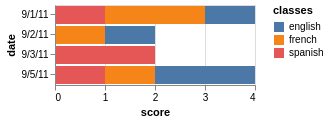

In [53]:
df53 = load_input_table("053.json")
#no transformation

df53 = df53.groupby(['classes', 'date']).count().reset_index()

print(df53)

print(df53.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "y": {"field": "date", "type": "nominal"},
    "color": { "field": "classes", "type": "nominal" },
    "x": { "field": "score", "type": "quantitative" },
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df53)

      ACH_DATE               MEASURE             NAME  VALUE
0   2017-09-01     DIAG_RATE_65_PLUS   WEST YORKSHIRE   73.6
1   2017-09-01  DIAG_RATE_65_PLUS_LL   WEST YORKSHIRE   66.2
2   2017-09-01  DIAG_RATE_65_PLUS_UL   WEST YORKSHIRE   79.8
3   2017-10-01     DIAG_RATE_65_PLUS   WEST YORKSHIRE   73.7
4   2017-10-01  DIAG_RATE_65_PLUS_LL   WEST YORKSHIRE   66.3
5   2017-10-01  DIAG_RATE_65_PLUS_UL   WEST YORKSHIRE   80.0
6   2017-09-01     DIAG_RATE_65_PLUS  NOTTINGHAMSHIRE   77.0
7   2017-09-01  DIAG_RATE_65_PLUS_LL  NOTTINGHAMSHIRE   69.1
8   2017-09-01  DIAG_RATE_65_PLUS_UL  NOTTINGHAMSHIRE   83.6
9   2017-10-01     DIAG_RATE_65_PLUS  NOTTINGHAMSHIRE   77.5
10  2017-10-01  DIAG_RATE_65_PLUS_LL  NOTTINGHAMSHIRE   69.6
11  2017-10-01  DIAG_RATE_65_PLUS_UL  NOTTINGHAMSHIRE   84.2
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "errorbar"
    },
    "encoding": {
        "y": {
            "field": "VALUE",
            "type": "quantit

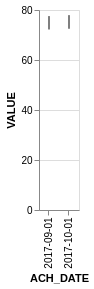

In [54]:
df54 = load_input_table("054.json")
#no transformation

print(df54)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "errorbar"},
  "encoding": {
    "y": {"field": "VALUE", "type": "quantitative"},
    "x": { "field": "ACH_DATE", "type": "nominal" },
    #"color": { "field": "MEASURE", "type": "nominal" },
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df54)

val1 id val2  a  b
0     A    c  2  2
1     A    d  4  4
2     B    c  2  5
3     B    d  1  2
4     C    c  3  5
5     C    d  2  4
6     D    c  5  4
7     D    d  1  3
[{"id":"A","val2":"c","a":2,"b":2},{"id":"A","val2":"d","a":4,"b":4},{"id":"B","val2":"c","a":2,"b":5},{"id":"B","val2":"d","a":1,"b":2},{"id":"C","val2":"c","a":3,"b":5},{"id":"C","val2":"d","a":2,"b":4},{"id":"D","val2":"c","a":5,"b":4},{"id":"D","val2":"d","a":1,"b":3}]
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "point"
    },
    "encoding": {
        "y": {
            "field": "a",
            "type": "quantitative"
        },
        "x": {
            "field": "b",
            "type": "quantitative"
        },
        "column": {
            "field": "val2",
            "type": "nominal"
        }
    }
}


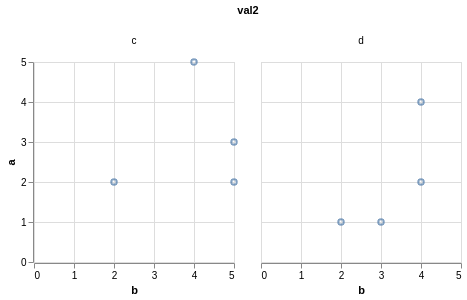

In [55]:
df55 = load_input_table("055.json")

splits = pd.DataFrame(df55["group_measure"].str.split('_', 1).tolist(), columns = ['val1',"val2"])
df55 = pd.concat([df55, splits], axis=1).reset_index()
df55 = df55.pivot_table(index=["id", "val2"], columns='val1', values='value').reset_index()

print(df55)

print(df55.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point"},
  "encoding": {
    "y": {"field": "a", "type": "quantitative"},
    "x": { "field": "b", "type": "quantitative" },
    "column": { "field": "val2", "type": "nominal" },
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df55)

{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "rect"
    },
    "encoding": {
        "y": {
            "field": "variable",
            "type": "nominal"
        },
        "x": {
            "field": "grp",
            "type": "nominal"
        },
        "column": {
            "field": "time",
            "type": "nominal"
        },
        "color": {
            "field": "value",
            "type": "quantitative"
        }
    }
}


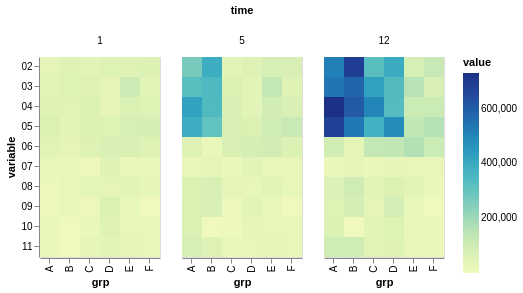

In [56]:
df56 = load_input_table("056.json")

df56 = pd.melt(df56, id_vars=["grp", "time"], value_vars=["02", "03", "04", "05", "06", "07", "08", "09", "10", "11"])

#print(df56)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "rect"},
  "encoding": {
    "y": {"field": "variable", "type": "nominal"},
    "x": { "field": "grp", "type": "nominal" },
    "column": { "field": "time", "type": "nominal" },
    "color": { "field": "value", "type": "quantitative" },
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df56)

axis group   g     x      y
0        1   0  10.0   8.04
1        1   1   8.0   6.95
2        1   2  13.0   7.58
3        1   3   9.0   8.81
4        1   4  11.0   8.33
5        1   5  14.0   9.96
6        1   6   6.0   7.24
7        1   7   4.0   4.26
8        1   8  12.0  10.84
9        1   9   7.0   4.82
10       1  10   5.0   5.68
11       2   0  10.0   9.14
12       2   1   8.0   8.14
13       2   2  13.0   8.74
14       2   3   9.0   8.77
15       2   4  11.0   9.26
16       2   5  14.0   8.10
17       2   6   6.0   6.13
18       2   7   4.0   3.10
19       2   8  12.0   9.13
20       2   9   7.0   7.26
21       2  10   5.0   4.74
22       3   0  10.0   7.46
23       3   1   8.0   6.77
24       3   2  13.0  12.74
25       3   3   9.0   7.11
26       3   4  11.0   7.81
27       3   5  14.0   8.84
28       3   6   6.0   6.08
29       3   7   4.0   5.39
30       3   8  12.0   8.15
31       3   9   7.0   6.42
32       3  10   5.0   5.73
33       4   0   8.0   6.58
34       4   1   8.0

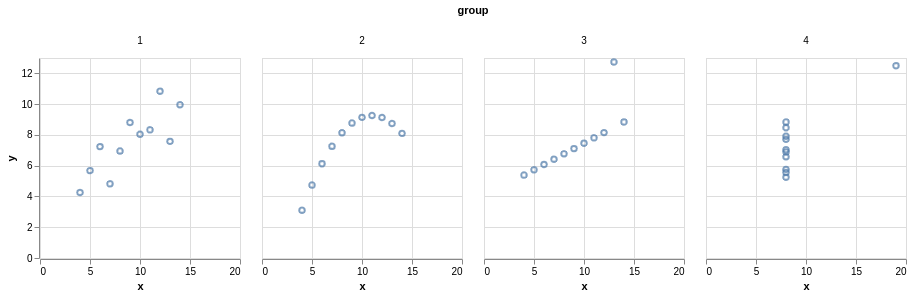

In [57]:
df57 = load_input_table("057.json")

df57 = pd.melt(df57, id_vars=[], value_vars=["x_1", "x_2", "x_3", "x_4", "y_1", "y_2", "y_3", "y_4"])
splits = pd.DataFrame(df57["variable"].str.split('_', 1).tolist(), columns = ['axis','group'])
df57 = pd.concat([df57, splits], axis=1).reset_index()
df57['g'] = df57.groupby(['axis', "group"])['axis'].cumcount()
df57 = df57.pivot_table(index=["group", "g"], columns='axis', values='value').reset_index()

print(df57)

#print(df57.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point"},
  "encoding": {
    "x": {"field": "x", "type": "quantitative"},
    "y": { "field": "y", "type": "quantitative" },
    "column": { "field": "group", "type": "nominal" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df57)

    count        date   retailer       type
0      12  04/17/2018  Retailer1  Completed
1      13  04/17/2018  Retailer1     Missed
2      10  04/17/2018  Retailer2  Completed
3      10  04/19/2018  Retailer1  Completed
4       1  04/19/2018  Retailer1     Missed
5       2  04/20/2018  Retailer2  Completed
6       1  04/20/2018  Retailer1     Missed
7       2  04/21/2018  Retailer1  Completed
8       1  04/21/2018  Retailer2  Completed
9       1  04/21/2018  Retailer1     Missed
10      2  04/23/2018  Retailer1  Completed
11      2  04/23/2018  Retailer2     Missed
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "encoding": {
        "x": {
            "field": "count",
            "type": "quantitative"
        },
        "y": {
            "field": "date",
            "type": "nominal"
        },
        "column": {
            "field": "retailer",
            "type": "nominal"
        },
        "color": {
          

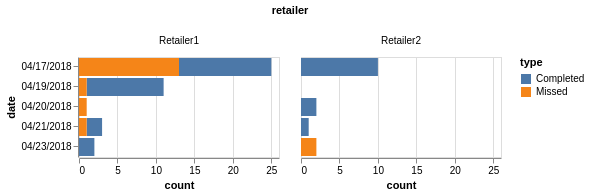

In [58]:
df58 = load_input_table("058.json")
# no transformation

print(df58)

#print(df58.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "x": {"field": "count", "type": "quantitative"},
    "y": { "field": "date", "type": "nominal" },
    "column": { "field": "retailer", "type": "nominal" },
    "color": { "field": "type", "type": "nominal" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df58)

group  ID   time  g1  g2
0       1   0min   1  10
1       1  10min   4  13
2       1  30min   7  16
3       2   0min   2  11
4       2  10min   5  14
5       2  30min   8  17
6       3   0min   3  12
7       3  10min   6  15
8       3  30min   9  18
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "point"
    },
    "encoding": {
        "x": {
            "field": "g1",
            "type": "quantitative"
        },
        "y": {
            "field": "g2",
            "type": "quantitative"
        },
        "column": {
            "field": "ID",
            "type": "nominal"
        }
    }
}


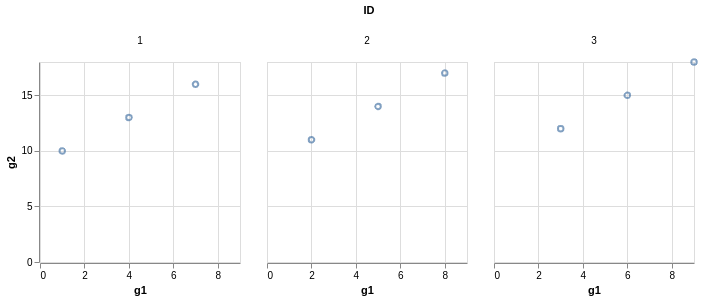

In [59]:
df59 = load_input_table("059.json")

df59 = pd.melt(df59, id_vars=["name", "ID"], 
                value_vars=["persons_g1_0min", "persons_g1_10min", 
                            "persons_g1_30min", "persons_g2_0min", 
                            "persons_g2_10min", "persons_g2_30min"])

splits = pd.DataFrame(df59["variable"].str.split('_', 2).tolist(), columns = ['v1','group', "time"])
df59 = pd.concat([df59, splits], axis=1).reset_index()
df59 = df59.pivot_table(index=["ID", "time"], columns='group', values='value').reset_index()

print(df59)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point"},
  "encoding": {
    "x": {"field": "g1", "type": "quantitative"},
    "y": { "field": "g2", "type": "quantitative" },
    "column": { "field": "ID", "type": "nominal" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df59)

fac  g  trial1  trial2
0    0  1.0355  1.7138
1    1  1.4998  2.6099
2    2  2.1847  4.3185
3    3  1.0140  2.8532
4    4  1.8388  3.2195
5    5  1.3549  4.4374
6    6  0.9128  2.1362
7    7  1.6856  2.5519
8    8  3.0877  1.2056
9    9  3.2488  2.6400
{
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "line"
    },
    "encoding": {
        "x": {
            "field": "trial2",
            "type": "quantitative"
        },
        "y": {
            "field": "trial1",
            "type": "quantitative"
        }
    }
}


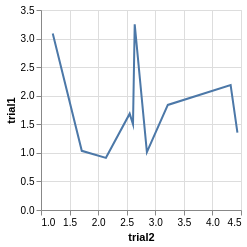

In [60]:
df60 = load_input_table("060.json")

df60['g'] = df60.groupby(['fac'])['score'].cumcount()
df60 = df60.pivot_table(index=["g"], columns='fac', values='score').reset_index()

print(df60)

#print(df60.to_json(orient="records"))

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "line"},
  "encoding": {
    "x": {"field": "trial2", "type": "quantitative"},
    "y": { "field": "trial1", "type": "quantitative" }
  }
}

print(json.dumps(spec, indent=4))

VegaLite(spec, df60)